**K Nearest Neighbor(KNN):**

KNN is a supervised machine learning algorithm which is used for both classification as well as for regression. It is also called as lazy algorithm as it predicts from the training data and learns or memorizes the data. For small featured dataset knn works well.

1. When there is a classification problem for KNN algorithm k value is choosen and to classify the new data point between the classes, the nearest neighbor is identified using different distance methods like Eucledian distance, Manhattan distance, Hamming distance(which is used for binary data), Minkowski distance.

2. When there is regression problem for KNN algorithm k value is choosen and mean and median is calculated to find the nearest neighbor for the new data point.

In [5]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [6]:
knn_dataset = pd.read_csv("/content/framingham.csv")

In [7]:
knn_dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
knn_dataset=knn_dataset.dropna()

In [9]:
knn_features=knn_dataset.drop("TenYearCHD",axis=1)
knn_target=knn_dataset["TenYearCHD"]

In [10]:
X_train,X_test,y_train,y_test=train_test_split(knn_features,knn_target,test_size=0.25)

As k value is 1 the accuracy is 78 percent

In [33]:
knn_model= KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)
round((knn_model.score(X_test,y_test)),2)

0.78

Let us find the k value(n_neighbor) between 1 to 15 (15 excluded) and plot between the range and the error values (where predicted and actual values are not equal)

In [41]:
k_values = []
for i in range(1, 15):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    knn_predict = knn_model.predict(X_test)
    k_values.append(np.mean(knn_predict != y_test))

As the plot is fluctuating , the error value becomes standard at some point we take that value as k value and in the plot we can see that after 9 the graph is standard.

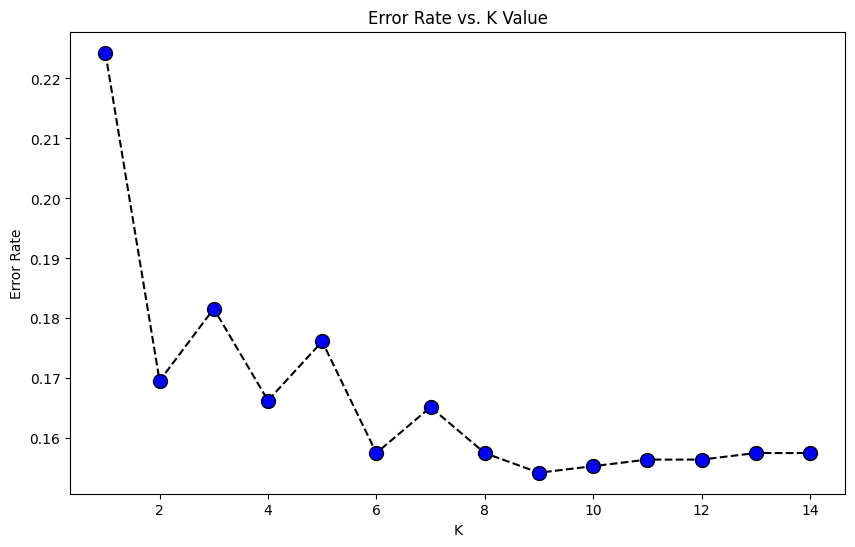

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), k_values, color='black',linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Score of the KNN model within the range of 1 to 15 on test data. We can see that as k value is changing, the score of the testing data is also changing.

In [37]:
score=[]
train_score=[]
for i in range(1,15):
  knn_model=KNeighborsClassifier(n_neighbors=i)
  knn_model.fit(X_train,y_train)
  score.append(round((knn_model.score(X_test,y_test)),2))
  train_score.append(round((knn_model.score(X_train,y_train)),2))
print("test score:",score)
print("train score",train_score)

test score: [0.78, 0.83, 0.82, 0.83, 0.82, 0.84, 0.83, 0.84, 0.85, 0.84, 0.84, 0.84, 0.84, 0.84]
train score [1.0, 0.88, 0.89, 0.87, 0.87, 0.86, 0.86, 0.85, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86]
